In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weather_data.csv", names=["timestamp", "temperature", "humidity"], parse_dates=["timestamp"])
df.tail()

,timestamp,temperature,humidity
1024,2025-09-22 14:18:55,31.1,87.0
1025,2025-09-22 14:19:00,31.8,87.0
1026,2025-09-22 14:19:05,31.4,87.0
1027,2025-09-22 14:19:10,31.3,86.0
1028,2025-09-22 14:19:16,31.2,87.0


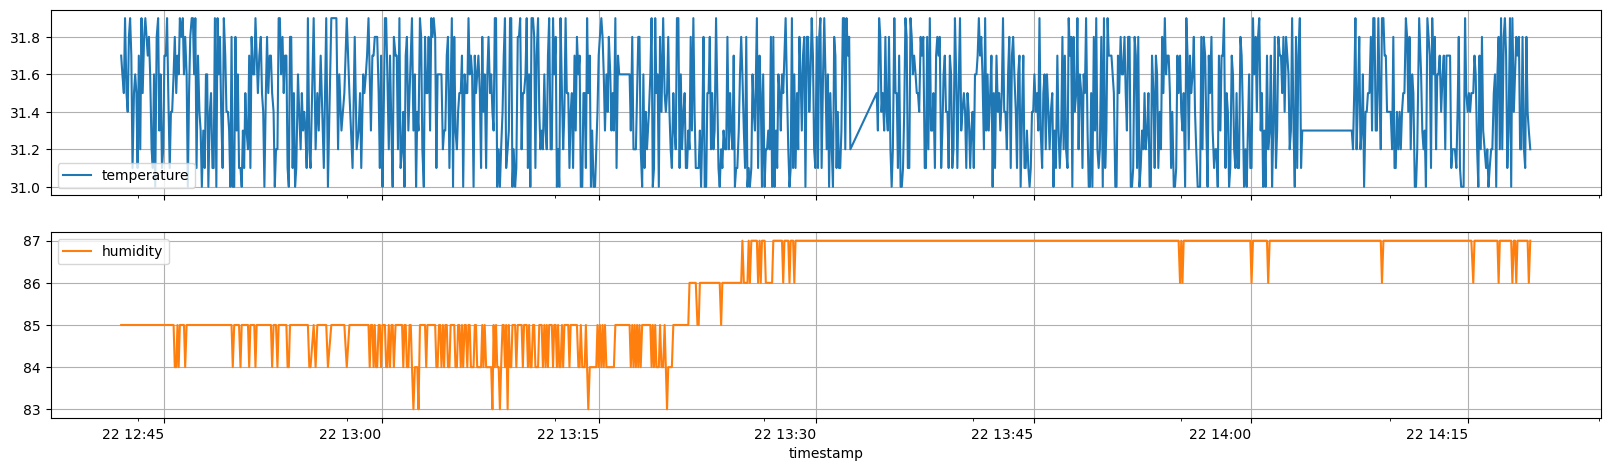

In [3]:
df.plot(
    x="timestamp",
    y=["temperature", "humidity"],
    subplots=True,
    figsize=(20, 6),
    grid=True,
)
plt.xticks(rotation=0)
plt.show()

In [4]:
df.tail(1) # Display the most recent data point

,timestamp,temperature,humidity
1028,2025-09-22 14:19:16,31.2,87.0


In [5]:
df.describe()

,timestamp,temperature,humidity
count,1029,1029.000000,1029.000000
mean,2025-09-22 13:30:04.012633856,31.453256,85.981535
min,2025-09-22 12:42:02,31.000000,83.000000
25%,2025-09-22 13:06:15,31.200000,85.000000
50%,2025-09-22 13:29:21,31.500000,87.000000
75%,2025-09-22 13:53:26,31.700000,87.000000
max,2025-09-22 14:19:16,31.900000,87.000000
std,NaN,0.291850,1.159737


In [6]:
temp_mean = df["temperature"].mean()
temp_std = df["temperature"].std()
humidity_mean = df["humidity"].mean()
humidity_std = df["humidity"].std()

df["temp_anomaly"] = (df["temperature"] > temp_mean + 2*temp_std) | (df["temperature"] < temp_mean - 2*temp_std)
df["humidity_anomaly"] = (df["humidity"] > humidity_mean + 2*humidity_std) | (df["humidity"] < humidity_mean - 2*humidity_std)

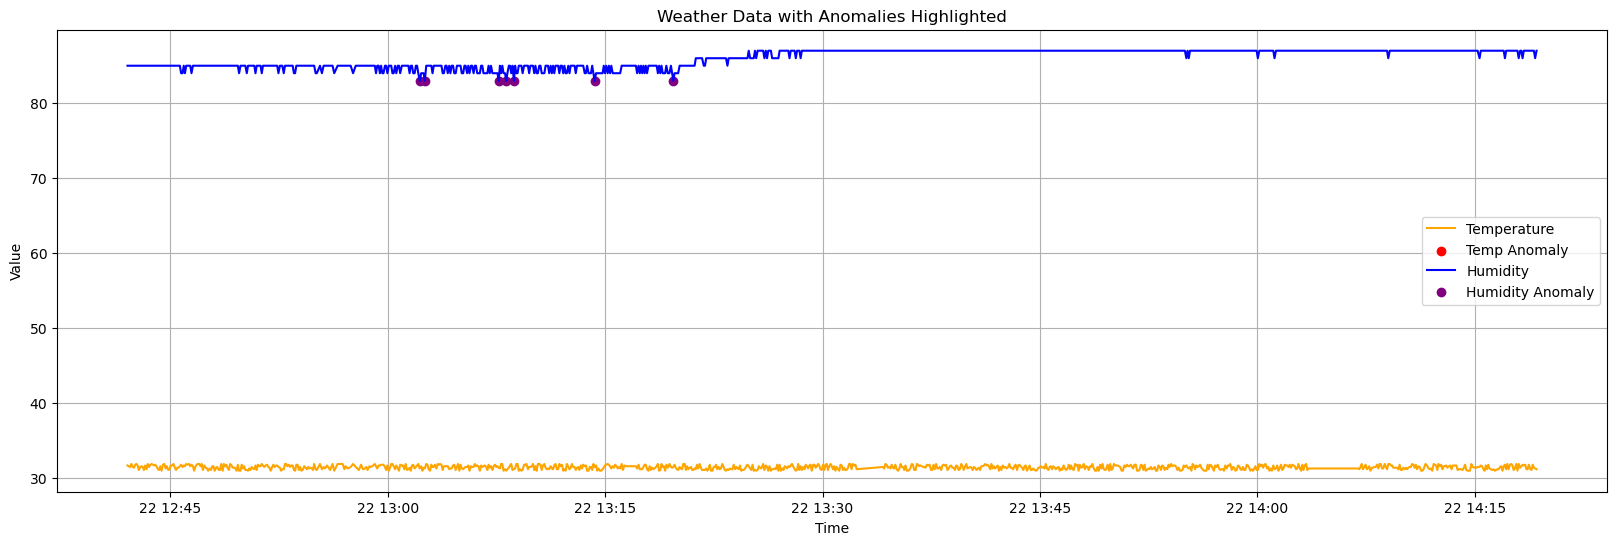

In [7]:
plt.figure(figsize=(20,6))

plt.plot(df["timestamp"], df["temperature"], label="Temperature", color="orange")
plt.scatter(df["timestamp"][df["temp_anomaly"]], df["temperature"][df["temp_anomaly"]], color="red", label="Temp Anomaly")

# Plot humidity
plt.plot(df["timestamp"], df["humidity"], label="Humidity", color="blue")
plt.scatter(df["timestamp"][df["humidity_anomaly"]], df["humidity"][df["humidity_anomaly"]], color="purple", label="Humidity Anomaly")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Weather Data with Anomalies Highlighted")
plt.legend()
plt.grid(True)
plt.show()


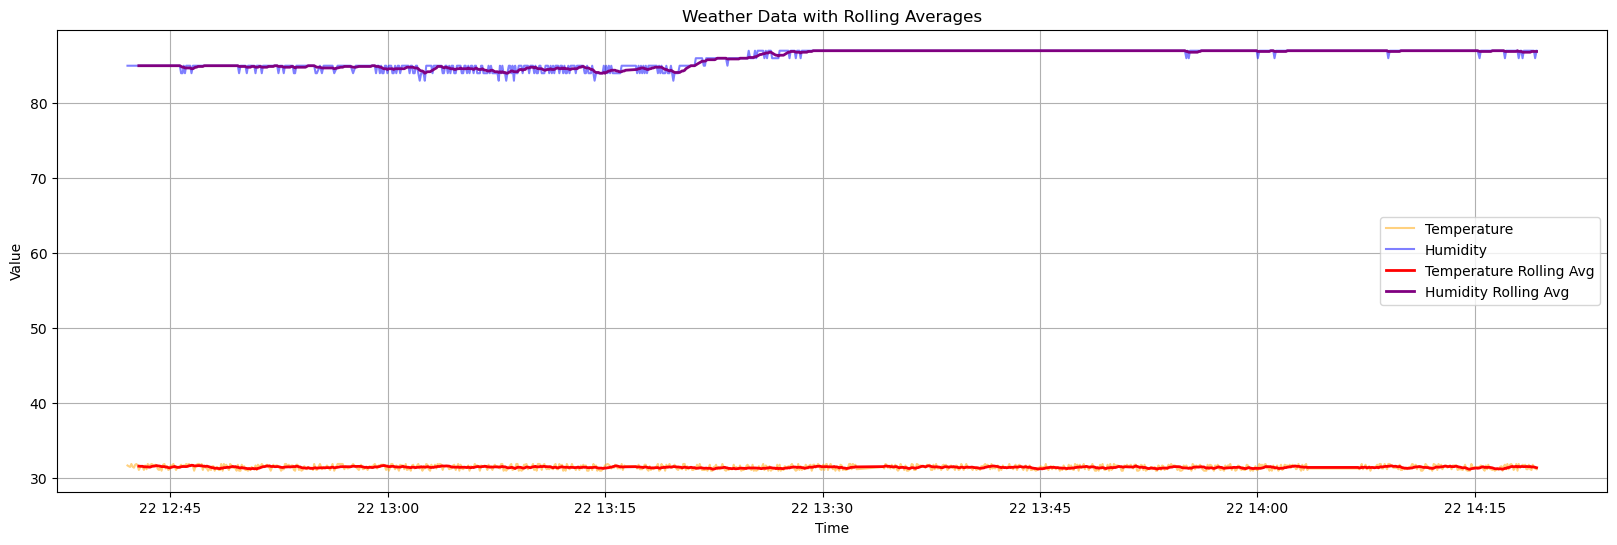

In [8]:
df["temp_roll_avg"] = df["temperature"].rolling(window=10).mean()
df["humidity_roll_avg"] = df["humidity"].rolling(window=10).mean()

plt.figure(figsize=(20,6))

# Plot original data
plt.plot(df["timestamp"], df["temperature"], label="Temperature", color="orange", alpha=0.5)
plt.plot(df["timestamp"], df["humidity"], label="Humidity", color="blue", alpha=0.5)

# Plot rolling averages
plt.plot(df["timestamp"], df["temp_roll_avg"], label="Temperature Rolling Avg", color="red", linewidth=2)
plt.plot(df["timestamp"], df["humidity_roll_avg"], label="Humidity Rolling Avg", color="purple", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Weather Data with Rolling Averages")
plt.legend()
plt.grid(True)
plt.show()


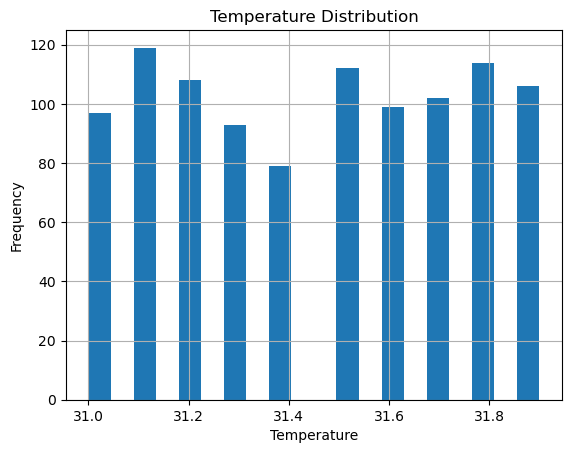

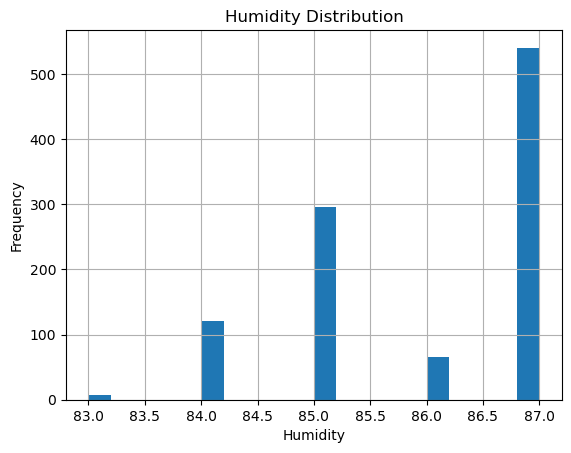

In [14]:
df["temperature"].hist(bins=20)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()
df["humidity"].hist(bins=20)
plt.title("Humidity Distribution")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()
